In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


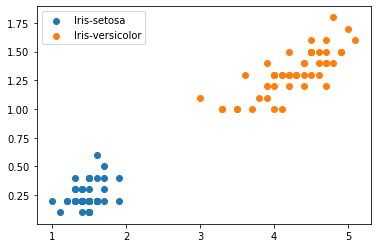

In [3]:
feature1 = 'petal_length'
feature2 = 'petal_width'
data = data[[feature1, feature2, 'class']]

classes = ['Iris-setosa', 'Iris-versicolor']
for cls in classes:
    curr_data = data[data['class'] == cls]
    plt.scatter(curr_data[feature1], curr_data[feature2], label=cls)
plt.legend()
plt.show()

data = data[data['class'].isin(classes)]

train_data = data.sample(frac=0.8)
val_data = data.drop(train_data.index)

In [4]:
X = np.array(train_data[[feature1, feature2]])
num_samples, num_features = X.shape
Y = np.where(train_data['class'] == classes[0], 1, -1)
num_iters = 2000
lr = 0.001
B = np.random.rand(1)
W = np.random.rand(2)
lambda_param = 0.001

for i in np.arange(num_iters):
    for x, y in zip(X, Y):
        y = np.array([y])
        if (y * (x @ W - B)) >= 1:
            W -= lr * (lambda_param * 2 * W)
        else:
            W -= lr * (lambda_param * 2 * W - (x[:, None] @ y))
            B -= lr * y
            
            
    if (i+1) % 500 == 0:
        XW = X @ W
        zeros = np.zeros(XW.shape)
        cost = lambda_param * np.sqrt(W @ W.T) + np.sum(np.maximum(zeros, 1 - Y * (XW - B))) / num_samples
        print(f'iteration={i+1} cost={cost:.5f}')

iteration=500 cost=0.00754
iteration=1000 cost=0.00371
iteration=1500 cost=0.00204
iteration=2000 cost=0.00161


In [5]:
def acc(X, W, B, Y):
    corr = np.sum(np.sign(X @ W - B) == Y)
    return corr / len(X)

print(f'Train Accuracy={acc(X, W, B, Y):.3f}')

Train Accuracy=1.000


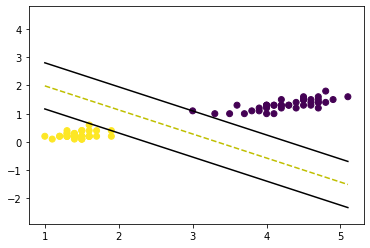

In [6]:
def visualize_svm(X, W, Y, B):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=Y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, W, B, 0)
    x1_2 = get_hyperplane_value(x0_2, W, B, 0)

    x1_1_m = get_hyperplane_value(x0_1, W, B, -1)
    x1_2_m = get_hyperplane_value(x0_2, W, B, -1)

    x1_1_p = get_hyperplane_value(x0_1, W, B, 1)
    x1_2_p = get_hyperplane_value(x0_2, W, B, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

X = np.array(train_data[[feature1, feature2]])
Y = np.where(train_data['class'] == classes[0], 1, -1)
visualize_svm(X, W, Y, B)